In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
# Read the csv file into a pandas DataFrame

movies_data = pd.read_csv('Resources/movies_cleaned.csv')
movies_data.head()

,Unnamed: 0,profit,budget,company,country,director,genre,gross,name,rating,released,runtime,star,writer,year,ROI_pct,release_dt
0,0,44287414,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,Wil Wheaton,Stephen King,1986,553.592675,1986-08-22
1,1,64136369,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,Matthew Broderick,John Hughes,1986,1068.939483,1986-06-11
2,2,164800601,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,Tom Cruise,Jim Cash,1986,1098.670673,1986-05-16
3,3,66660248,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,Sigourney Weaver,James Cameron,1986,360.325665,1986-07-18
4,4,9564613,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,Joey Cramer,Mark H. Baker,1986,106.273478,1986-08-01


In [57]:
movies_df=movies_data[["budget","runtime","ROI_pct"]]
movies_df.head()

,budget,runtime,ROI_pct
0,8000000,89,553.592675
1,6000000,103,1068.939483
2,15000000,110,1098.670673
3,18500000,137,360.325665
4,9000000,90,106.273478


In [63]:
# Assign the data to X and y

X = movies_df[["budget", "runtime"]]
y = movies_df["ROI_pct"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4638, 2) (4638, 1)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
# # Use train_test_split to create training and testing data

# ### BEGIN SOLUTION
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ### END SOLUTION

In [65]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [66]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.001318259999046556
Testing Score: -1.9232050093700543


Text(0.5, 1.0, 'Residual Plot')

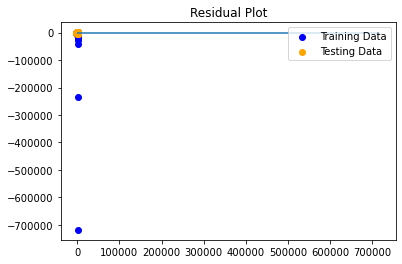

In [67]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
## END SOLUTION